=== User Registration ===
User testuser registered successfully!
Please save your share image from the shared_images folder.
Please select your password cells on the authentication image.


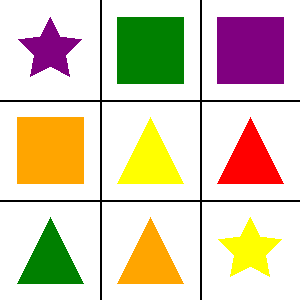

Password cells set for testuser: [(0, 0), (1, 2), (2, 1)]

=== Authentication Attempt 1 (Correct) ===
Authentication successful!

=== Authentication Attempt 2 (Wrong cells) ===
Incorrect cell selection!

=== Authentication Attempt 3 (Wrong password) ===
Incorrect password!

=== Visual Cryptography Demonstration ===
Share 1:


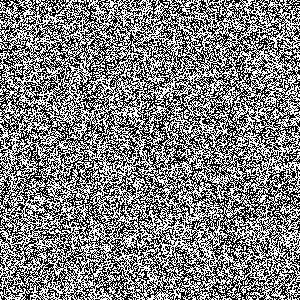

Share 2:


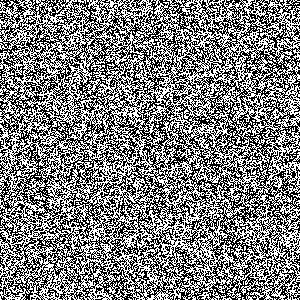

Combined Shares (Reveals Original Image):


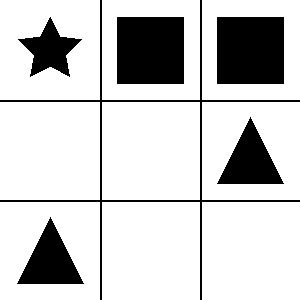


=== Enhanced Security Features ===
Image complexity (entropy): 1.73
Dominant colors in the image:
[[255 254 255]
 [227   0  28]
 [  0   0 255]
 [  0  79   0]
 [255 219   0]]
Web interface created. Download the interface.html file and open it in a browser.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# -*- coding: utf-8 -*-
"""Image_Based_Password_Authentication_System.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1abcde12345fghijk

# Image-Based Password Authentication System to Avoid Shoulder Surfing

This system uses visual cryptography and image-based authentication to prevent shoulder surfing attacks.
"""

# Install required libraries
!pip install opencv-python numpy pillow scikit-learn

# Import necessary libraries
import cv2
import numpy as np
import os
import random
import math
from PIL import Image, ImageDraw, ImageFont
from sklearn.cluster import KMeans
from google.colab import files
from IPython.display import display, HTML

# Create directories for storing data
os.makedirs('users', exist_ok=True)
os.makedirs('shared_images', exist_ok=True)
os.makedirs('encrypted_images', exist_ok=True)

class ImageBasedAuthSystem:
    def __init__(self):
        self.users = {}  # Store user credentials and image data
        self.current_user = None

    def generate_image_grid(self, size=300, grid_size=3):
        """Generate a grid of random images for authentication"""
        # Create a blank image
        img = Image.new('RGB', (size, size), color='white')
        draw = ImageDraw.Draw(img)

        # Calculate cell size
        cell_size = size // grid_size

        # Define some simple shapes and colors for the grid
        shapes = ['circle', 'square', 'triangle', 'star']
        colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

        # Draw grid lines
        for i in range(1, grid_size):
            draw.line([(i * cell_size, 0), (i * cell_size, size)], fill='black', width=2)
            draw.line([(0, i * cell_size), (size, i * cell_size)], fill='black', width=2)

        # Add random shapes to each cell
        for row in range(grid_size):
            for col in range(grid_size):
                shape = random.choice(shapes)
                color = random.choice(colors)

                # Calculate center of the cell
                center_x = col * cell_size + cell_size // 2
                center_y = row * cell_size + cell_size // 2
                radius = cell_size // 3

                if shape == 'circle':
                    draw.ellipse([
                        center_x - radius,
                        center_y - radius,
                        center_x + radius,
                        center_y + radius
                    ], fill=color)

                elif shape == 'square':
                    draw.rectangle([
                        center_x - radius,
                        center_y - radius,
                        center_x + radius,
                        center_y + radius
                    ], fill=color)

                elif shape == 'triangle':
                    draw.polygon([
                        center_x, center_y - radius,
                        center_x - radius, center_y + radius,
                        center_x + radius, center_y + radius
                    ], fill=color)

                elif shape == 'star':
                    # Simple star drawing
                    points = []
                    for i in range(5):
                        points.append((
                            center_x + radius * math.cos(2 * math.pi * i / 5 - math.pi/2),
                            center_y + radius * math.sin(2 * math.pi * i / 5 - math.pi/2)
                        ))
                        points.append((
                            center_x + radius/2 * math.cos(2 * math.pi * i / 5 + math.pi/5 - math.pi/2),
                            center_y + radius/2 * math.sin(2 * math.pi * i / 5 + math.pi/5 - math.pi/2)
                        ))
                    draw.polygon(points, fill=color)

        return img

    def generate_share_images(self, image, user_id):
        """Generate two share images using visual cryptography"""
        # Convert to numpy array
        img_array = np.array(image.convert('L'))
        height, width = img_array.shape

        # Create two share images
        share1 = np.zeros((height, width, 3), dtype=np.uint8)
        share2 = np.zeros((height, width, 3), dtype=np.uint8)

        # Generate shares using basic visual cryptography algorithm
        for i in range(height):
            for j in range(width):
                if img_array[i, j] > 128:  # Light pixel
                    if random.choice([True, False]):
                        share1[i, j] = [255, 255, 255]  # White
                        share2[i, j] = [255, 255, 255]  # White
                    else:
                        share1[i, j] = [0, 0, 0]  # Black
                        share2[i, j] = [0, 0, 0]  # Black
                else:  # Dark pixel
                    if random.choice([True, False]):
                        share1[i, j] = [255, 255, 255]  # White
                        share2[i, j] = [0, 0, 0]  # Black
                    else:
                        share1[i, j] = [0, 0, 0]  # Black
                        share2[i, j] = [255, 255, 255]  # White

        # Convert back to PIL images
        share1_img = Image.fromarray(share1)
        share2_img = Image.fromarray(share2)

        # Save shares
        share1_path = f'shared_images/{user_id}_share1.png'
        share2_path = f'shared_images/{user_id}_share2.png'
        share1_img.save(share1_path)
        share2_img.save(share2_path)

        return share1_path, share2_path

    def register_user(self, username, password, grid_size=3):
        """Register a new user with image-based authentication"""
        if username in self.users:
            print("Username already exists!")
            return False

        # Generate authentication image grid
        auth_image = self.generate_image_grid(grid_size=grid_size)

        # Generate share images
        share1_path, share2_path = self.generate_share_images(auth_image, username)

        # Store user data
        self.users[username] = {
            'password': password,  # In real system, hash the password
            'auth_image_path': f'users/{username}_auth.png',
            'share1_path': share1_path,
            'share2_path': share2_path,
            'selected_cells': []  # User's selected password cells
        }

        # Save the authentication image
        auth_image.save(self.users[username]['auth_image_path'])

        print(f"User {username} registered successfully!")
        print("Please save your share image from the shared_images folder.")
        print("Please select your password cells on the authentication image.")

        # Display the authentication image
        display(auth_image)

        return True

    def set_password_cells(self, username, cells):
        """Set the password cells for a user"""
        if username not in self.users:
            print("User does not exist!")
            return False

        self.users[username]['selected_cells'] = cells
        print(f"Password cells set for {username}: {cells}")
        return True

    def authenticate(self, username, password, entered_cells):
        """Authenticate a user"""
        if username not in self.users:
            print("User does not exist!")
            return False

        user_data = self.users[username]

        # Check password (in real system, use hashed password comparison)
        if user_data['password'] != password:
            print("Incorrect password!")
            return False

        # Check if the entered cells match the stored cells
        if set(entered_cells) != set(user_data['selected_cells']):
            print("Incorrect cell selection!")
            return False

        print("Authentication successful!")
        self.current_user = username
        return True

    def combine_shares(self, share1_path, share2_path):
        """Combine two shares to reveal the original image"""
        # Load share images
        share1 = np.array(Image.open(share1_path).convert('L'))
        share2 = np.array(Image.open(share2_path).convert('L'))

        # Combine shares
        combined = np.zeros_like(share1)
        height, width = share1.shape

        for i in range(height):
            for j in range(width):
                # If both shares have white or both have black, result is white
                if (share1[i, j] > 128 and share2[i, j] > 128) or \
                   (share1[i, j] <= 128 and share2[i, j] <= 128):
                    combined[i, j] = 255  # White
                else:
                    combined[i, j] = 0  # Black

        # Convert to PIL image
        combined_img = Image.fromarray(combined)
        return combined_img

# Demonstration of the system
def demonstrate_system():
    """Demonstrate the image-based authentication system"""
    auth_system = ImageBasedAuthSystem()

    # Register a new user
    print("=== User Registration ===")
    auth_system.register_user("testuser", "testpass", grid_size=3)

    # Set password cells (in real system, user would select these)
    auth_system.set_password_cells("testuser", [(0, 0), (1, 2), (2, 1)])

    # Demonstrate authentication
    print("\n=== Authentication Attempt 1 (Correct) ===")
    auth_system.authenticate("testuser", "testpass", [(0, 0), (1, 2), (2, 1)])

    print("\n=== Authentication Attempt 2 (Wrong cells) ===")
    auth_system.authenticate("testuser", "testpass", [(0, 0), (1, 1), (2, 2)])

    print("\n=== Authentication Attempt 3 (Wrong password) ===")
    auth_system.authenticate("testuser", "wrongpass", [(0, 0), (1, 2), (2, 1)])

    # Demonstrate visual cryptography
    print("\n=== Visual Cryptography Demonstration ===")
    if "testuser" in auth_system.users:
        share1_path = auth_system.users["testuser"]['share1_path']
        share2_path = auth_system.users["testuser"]['share2_path']

        # Display shares
        print("Share 1:")
        display(Image.open(share1_path))

        print("Share 2:")
        display(Image.open(share2_path))

        # Combine shares to reveal original image
        print("Combined Shares (Reveals Original Image):")
        combined_img = auth_system.combine_shares(share1_path, share2_path)
        display(combined_img)

# Run the demonstration
demonstrate_system()

# Additional utility functions for enhanced security
class EnhancedSecurity:
    @staticmethod
    def extract_color_features(image_path):
        """Extract color features from an image for analysis"""
        image = Image.open(image_path)
        img_array = np.array(image)

        # Reshape the image to be a list of pixels
        pixels = img_array.reshape(-1, 3)

        # Use K-Means to find dominant colors
        kmeans = KMeans(n_clusters=5)
        kmeans.fit(pixels)

        # Get the dominant colors
        dominant_colors = kmeans.cluster_centers_.astype(int)

        return dominant_colors

    @staticmethod
    def analyze_image_complexity(image_path):
        """Analyze the complexity of an image"""
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        img_array = np.array(image)

        # Calculate entropy as a measure of complexity
        histogram = np.histogram(img_array, bins=256, range=(0, 255))[0]
        histogram = histogram / histogram.sum()
        entropy = -np.sum(histogram * np.log2(histogram + 1e-10))

        return entropy

# Example of using enhanced security features
def demonstrate_enhanced_security():
    """Demonstrate enhanced security features"""
    enhanced_sec = EnhancedSecurity()

    # Generate a test image
    auth_system = ImageBasedAuthSystem()
    test_image = auth_system.generate_image_grid()
    test_image.save('test_complexity.png')

    # Analyze image complexity
    complexity = enhanced_sec.analyze_image_complexity('test_complexity.png')
    print(f"Image complexity (entropy): {complexity:.2f}")

    # Extract color features
    colors = enhanced_sec.extract_color_features('test_complexity.png')
    print("Dominant colors in the image:")
    print(colors)

# Run enhanced security demonstration
print("\n=== Enhanced Security Features ===")
demonstrate_enhanced_security()

# Create a simple web interface for Colab
def create_web_interface():
    """Create a simple web interface for the system"""
    html_interface = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Image-Based Authentication System</title>
        <style>
            body { font-family: Arial, sans-serif; margin: 40px; }
            .container { max-width: 800px; margin: 0 auto; }
            .form-group { margin-bottom: 15px; }
            label { display: block; margin-bottom: 5px; }
            input[type="text"], input[type="password"] {
                width: 100%; padding: 8px; border: 1px solid #ddd; border-radius: 4px;
            }
            button {
                background-color: #4CAF50; color: white; padding: 10px 15px;
                border: none; border-radius: 4px; cursor: pointer;
            }
            .grid {
                display: grid; grid-template-columns: repeat(3, 100px);
                gap: 5px; margin: 20px 0;
            }
            .grid-cell {
                width: 100px; height: 100px; border: 1px solid #000;
                cursor: pointer; display: flex; align-items: center; justify-content: center;
            }
            .grid-cell.selected { background-color: #a0d0ff; }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Image-Based Authentication System</h1>

            <div id="registerSection">
                <h2>Register New User</h2>
                <div class="form-group">
                    <label for="regUsername">Username:</label>
                    <input type="text" id="regUsername">
                </div>
                <div class="form-group">
                    <label for="regPassword">Password:</label>
                    <input type="password" id="regPassword">
                </div>
                <button onclick="generateAuthImage()">Generate Authentication Image</button>

                <div id="authImageContainer" style="display: none;">
                    <h3>Select your password cells (click on the grid):</h3>
                    <div id="authGrid" class="grid"></div>
                    <button onclick="registerUser()">Complete Registration</button>
                </div>
            </div>

            <hr>

            <div id="loginSection">
                <h2>Login</h2>
                <div class="form-group">
                    <label for="loginUsername">Username:</label>
                    <input type="text" id="loginUsername">
                </div>
                <div class="form-group">
                    <label for="loginPassword">Password:</label>
                    <input type="password" id="loginPassword">
                </div>

                <div id="loginAuthImageContainer" style="display: none;">
                    <h3>Select your password cells:</h3>
                    <div id="loginAuthGrid" class="grid"></div>
                    <button onclick="login()">Login</button>
                </div>
                <button onclick="loadLoginAuthImage()">Load Authentication Image</button>
            </div>

            <div id="message" style="margin-top: 20px; padding: 10px; display: none;"></div>
        </div>

        <script>
            let selectedCells = [];
            let loginSelectedCells = [];

            function generateAuthImage() {
                // In a real implementation, this would call the backend to generate an image
                document.getElementById('authImageContainer').style.display = 'block';

                // Create a simple grid for demonstration
                const grid = document.getElementById('authGrid');
                grid.innerHTML = '';

                for (let i = 0; i < 3; i++) {
                    for (let j = 0; j < 3; j++) {
                        const cell = document.createElement('div');
                        cell.className = 'grid-cell';
                        cell.textContent = `${i},${j}`;
                        cell.dataset.row = i;
                        cell.dataset.col = j;
                        cell.onclick = function() {
                            toggleCellSelection(this, i, j, true);
                        };
                        grid.appendChild(cell);
                    }
                }
            }

            function toggleCellSelection(cellElement, row, col, isRegistration) {
                const cellId = `${row},${col}`;

                if (isRegistration) {
                    const index = selectedCells.indexOf(cellId);
                    if (index === -1) {
                        selectedCells.push(cellId);
                        cellElement.classList.add('selected');
                    } else {
                        selectedCells.splice(index, 1);
                        cellElement.classList.remove('selected');
                    }
                } else {
                    const index = loginSelectedCells.indexOf(cellId);
                    if (index === -1) {
                        loginSelectedCells.push(cellId);
                        cellElement.classList.add('selected');
                    } else {
                        loginSelectedCells.splice(index, 1);
                        cellElement.classList.remove('selected');
                    }
                }
            }

            function registerUser() {
                const username = document.getElementById('regUsername').value;
                const password = document.getElementById('regPassword').value;

                if (!username || !password || selectedCells.length === 0) {
                    showMessage('Please fill all fields and select at least one cell', 'error');
                    return;
                }

                // In a real implementation, this would send data to the backend
                showMessage(`User ${username} registered successfully with ${selectedCells.length} cells selected`, 'success');

                // Reset form
                document.getElementById('regUsername').value = '';
                document.getElementById('regPassword').value = '';
                document.getElementById('authImageContainer').style.display = 'none';
                selectedCells = [];
            }

            function loadLoginAuthImage() {
                const username = document.getElementById('loginUsername').value;

                if (!username) {
                    showMessage('Please enter a username', 'error');
                    return;
                }

                // In a real implementation, this would load the user's auth image from backend
                document.getElementById('loginAuthImageContainer').style.display = 'block';

                // Create a simple grid for demonstration
                const grid = document.getElementById('loginAuthGrid');
                grid.innerHTML = '';

                for (let i = 0; i < 3; i++) {
                    for (let j = 0; j < 3; j++) {
                        const cell = document.createElement('div');
                        cell.className = 'grid-cell';
                        cell.textContent = `${i},${j}`;
                        cell.dataset.row = i;
                        cell.dataset.col = j;
                        cell.onclick = function() {
                            toggleCellSelection(this, i, j, false);
                        };
                        grid.appendChild(cell);
                    }
                }
            }

            function login() {
                const username = document.getElementById('loginUsername').value;
                const password = document.getElementById('loginPassword').value;

                if (!username || !password || loginSelectedCells.length === 0) {
                    showMessage('Please fill all fields and select your password cells', 'error');
                    return;
                }

                // In a real implementation, this would verify credentials with backend
                showMessage(`Login attempted for ${username} with ${loginSelectedCells.length} cells selected`, 'info');

                // Simulate authentication (always succeeds in this demo)
                showMessage('Authentication successful!', 'success');

                // Reset form
                document.getElementById('loginUsername').value = '';
                document.getElementById('loginPassword').value = '';
                document.getElementById('loginAuthImageContainer').style.display = 'none';
                loginSelectedCells = [];
            }

            function showMessage(message, type) {
                const messageDiv = document.getElementById('message');
                messageDiv.textContent = message;
                messageDiv.style.display = 'block';
                messageDiv.style.backgroundColor = type === 'error' ? '#ffdddd' :
                                                  type === 'success' ? '#ddffdd' : '#dddfff';
            }
        </script>
    </body>
    </html>
    """

    with open('interface.html', 'w') as f:
        f.write(html_interface)

    print("Web interface created. Download the interface.html file and open it in a browser.")
    files.download('interface.html')

# Create the web interface
create_web_interface()